# BASİT DOĞRUSAL REGRESYON

# İMPORT AND DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df = pd.read_csv("ford.csv")

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.70,1.00
1,Focus,2018,14000,Manual,9083,Petrol,150,57.70,1.00
2,Focus,2017,13000,Manual,12456,Petrol,150,57.70,1.00
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.30,1.50
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.70,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df[["engineSize","price"]].corr()

,engineSize,price
engineSize,1.00,0.41
price,0.41,1.00


# MODEL

In [ ]:
X = df[["engineSize"]]
y = df[["price"]]

In [ ]:
reg_model = LinearRegression().fit(X, y)

In [ ]:
# sabit
reg_model.intercept_[0]

6188.768876509271

In [ ]:
# ağırlık
reg_model.coef_[0][0]
# ağırlığın katsayısının 0 dan büyük olması eğilimin pozitif yönde olduğunu gösterir.

4508.982857051269

# TAHMİN İŞLEMİ

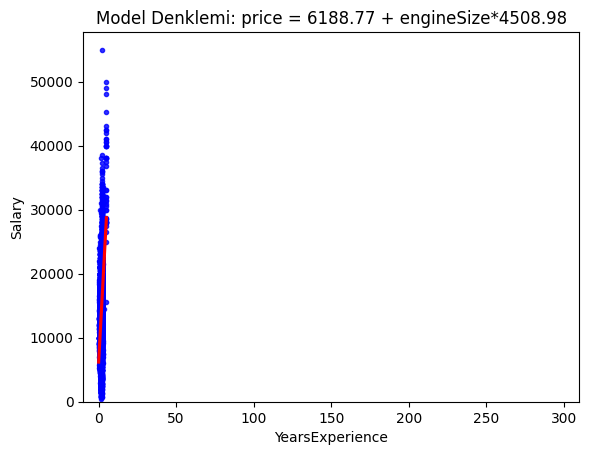

In [ ]:
# grafiğimizde gerçek değerlerin nasıl temsil edildiğine bakalım
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: price = {round(reg_model.intercept_[0], 2)} + engineSize*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Salary")
g.set_xlabel("YearsExperience")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

# TAHMİN BAŞARISI

In [ ]:
# MAE
y_pred = reg_model.predict(X)
mean_absolute_error(y, y_pred)
# tahminlerimizde ortalama 3366 değerinde bir hata(sapma) mevcuttur

3366.795643897901

In [ ]:
y.mean()

price   12279.53
dtype: float64

In [ ]:
y.std()

price   4741.34
dtype: float64